# **Data Exploration**

In this notebook we will look at some of the general characteristics of the dataset we are working with after pre-processing. This is a starting point for the exploration of our data with the intention to spot any anomalities in the data or any other features of interes.

In [ ]:
# General exploration visualizations module in repository
import general_data_exploration_visualizations as ev
import pandas as pd

# **Import data**

The dataset we are using to generate these results can be found in the data folder of the repository.

In [ ]:
# Load data (follow instruction in README.md to access the dataset)
df = pd.read_csv('../data/cleaned_dataset.csv')

In [ ]:
# Convert the column to numeric, invalid parsing will be set as NaN
df['Publication Year'] = pd.to_numeric(df['Publication Year'], errors='coerce')
df = df.dropna()

In [ ]:
df.head()

,Professor,Publication Year,Authors,Abstract
0,Abbas Firoozabadi,2024.0,Ding B.; Kantzas A.; Firoozabadi A.,CO2 storage in saline aquifers may contribute ...
1,Abbas Firoozabadi,2024.0,Chávez-Miyauchi T.E.; Kar T.; Ayirala S.; Yous...,Flooding with low salinity water (LSW) may inc...
2,Abbas Firoozabadi,2024.0,Kobayashi K.; Firoozabadi A.,Quartz is ubiquitous in subsurface formations....
3,Abbas Firoozabadi,2024.0,Jex M.; Mikyška J.; Firoozabadi A.,Successful large-scale compositional reservoir...
4,Abbas Firoozabadi,2024.0,Feng Y.; Firoozabadi A.,The wrong Supplementary file was originally pu...


# **General info**

In [ ]:
# Basic information about the dataset
print(df.info())

# Summary statistics for numerical columns (e.g., year of publication)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 16011 entries, 0 to 16089
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Professor         16011 non-null  object 
 1   Publication Year  16011 non-null  float64
 2   Authors           16011 non-null  object 
 3   Abstract          16011 non-null  object 
dtypes: float64(1), object(3)
memory usage: 625.4+ KB
None
       Publication Year
count      16011.000000
mean        2012.190432
std            9.432744
min         1906.000000
25%         2007.000000
50%         2014.000000
75%         2020.000000
max         2024.000000


In [ ]:
# Checking for missing values
print(df.isnull().sum())

Professor           0
Publication Year    0
Authors             0
Abstract            0
dtype: int64


In [ ]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

# **Publications**

## Author publication count

<ipython-input-7-aab9ee5b2932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.index, y=top_authors.values, palette=palette)


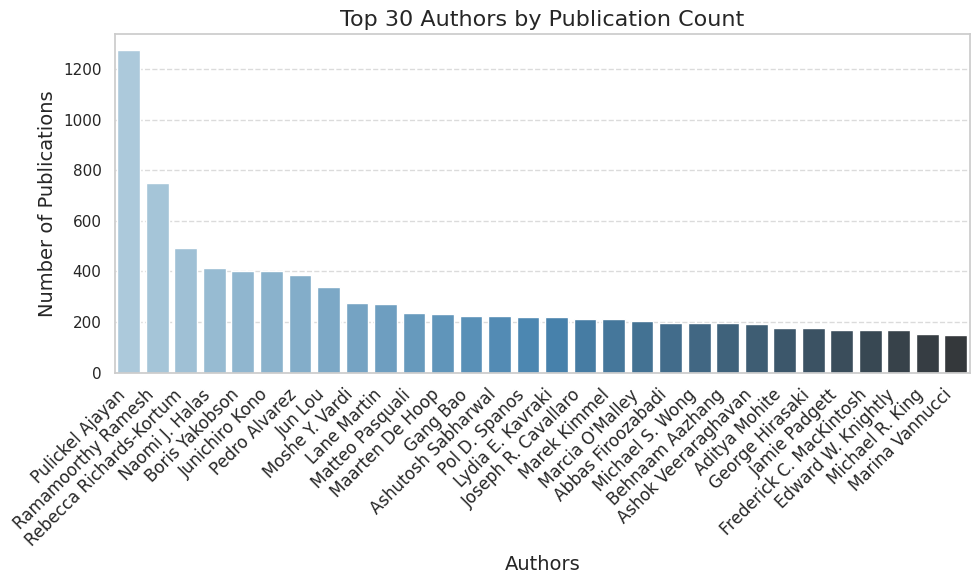

In [ ]:
# Generate plot using 'Professor' column
ev.plot_top_authors(df)

## Distribution of publications over time

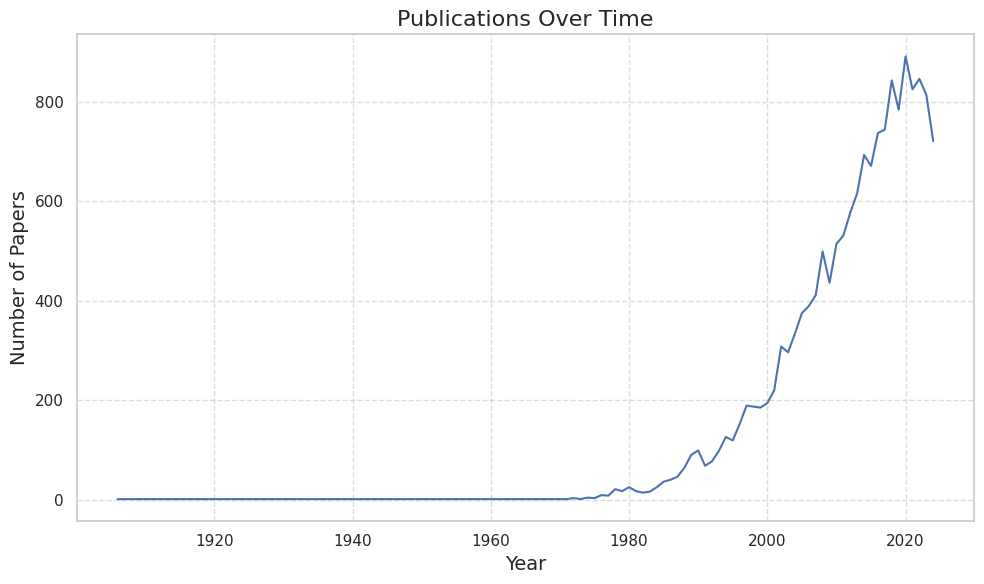

In [ ]:
# Generate plot using 'Publication Year' column
ev.plot_publications_over_time(df)

# **Word count analysis**

## Most common research keywords

<ipython-input-7-aab9ee5b2932>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words, palette="Blues_d")


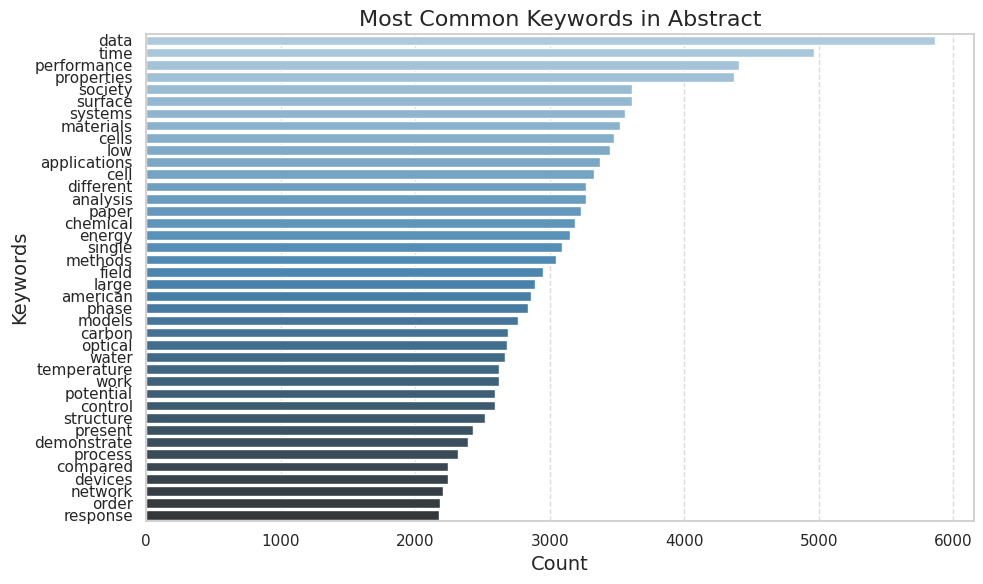

In [ ]:
# Generate plot using 'Abstract' column
ev.plot_most_common_words(df)

## Top cited words by year

In [ ]:
# Analyze the most common words for the year 2023
word_freq_by_year, most_common_words_2023 = ev.analyze_common_words_by_year(df, target_year=2023)

Most common words in 2023: [('data', 289), ('materials', 183), ('performance', 174), ('models', 171), ('properties', 168), ('energy', 166), ('different', 165), ('here,', 158), ('demonstrate', 157), ('methods', 156)]


<ipython-input-21-69c72672ff83>:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=common_words_df, palette="Blues_d")


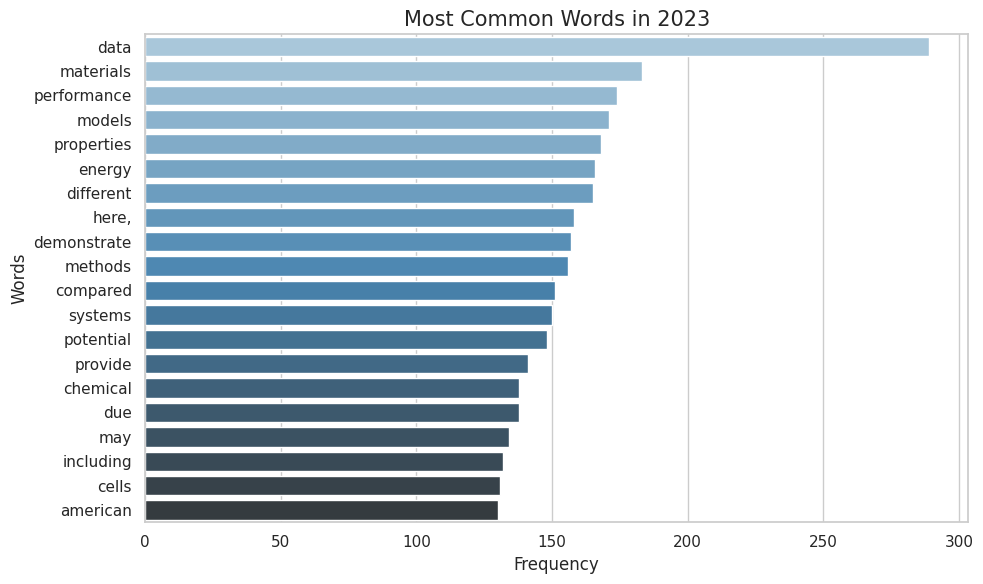

In [ ]:
# Use the word frequency dictionary for a given year to plot the top 20 words for that year
ev.plot_most_common_words_by_year(word_freq_by_year, year=2023, top_n=20)

As we can see in the plot above, this method of exploration counts words without considering their semantic relevance, so the stop-word tunning can be very innacurate. We will use different natural language methods for further analysis of the data.

## Word Cloud

This is an additional form of visualization for the most used words in the dataset. Again, this method does not consider semantic relevance of the words.

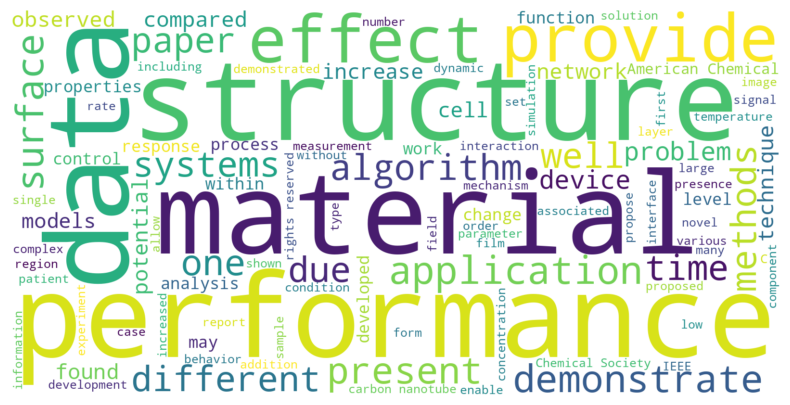

In [ ]:
# Generate a word cloud for the 'Abstract' column
ev.plot_wordcloud(df)